
For companies to stay competitive and skyrocket their growth, they need to leverage AI/ML to develop predictive models to forecast sales in the future.

Predictive models attempt at forecasting future sales based on historical data while taking into account seasonality effects, demand, holidays, promotions, and competition.

In this project, data from 1115 stores would be used for the prediction 

The objective is to predict future daily sales based on the features. 

Facebook Prophet Model will be used for the prediction



Import libraries and Datasets

In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set_style('whitegrid')
%matplotlib inline
#Source of dataset:   https://www.kaggle.com/c/rossmann-store-sales/data

In [2]:
#import datasets
df_train=pd.read_csv('C:/Users/dellm/OneDrive/Documents/store_train1.csv')
df_test=pd.read_csv('C:/Users/dellm/OneDrive/Documents/store_test1.csv')

C:\Users\dellm\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#visualize the dataset
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
df_train.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [5]:
#perform statistical analysis of dataset
df_train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [6]:
# to print the full data summary
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


Import specific store information dataset which is the test data 

In [7]:
df_store=pd.read_csv('C:/Users/dellm/OneDrive/Documents/store.csv')

In [8]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
df_store.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [10]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [11]:
df_store.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [12]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


Data exploration section

<AxesSubplot:>

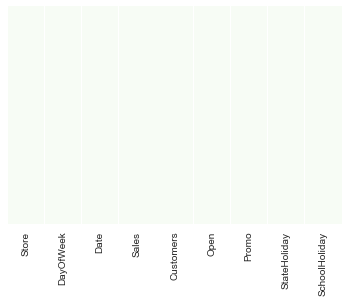

In [13]:
#need to confirm the missing data 
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='Greens')

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'Sales'}>],
       [<AxesSubplot:title={'center':'Customers'}>,
        <AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Promo'}>],
       [<AxesSubplot:title={'center':'SchoolHoliday'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

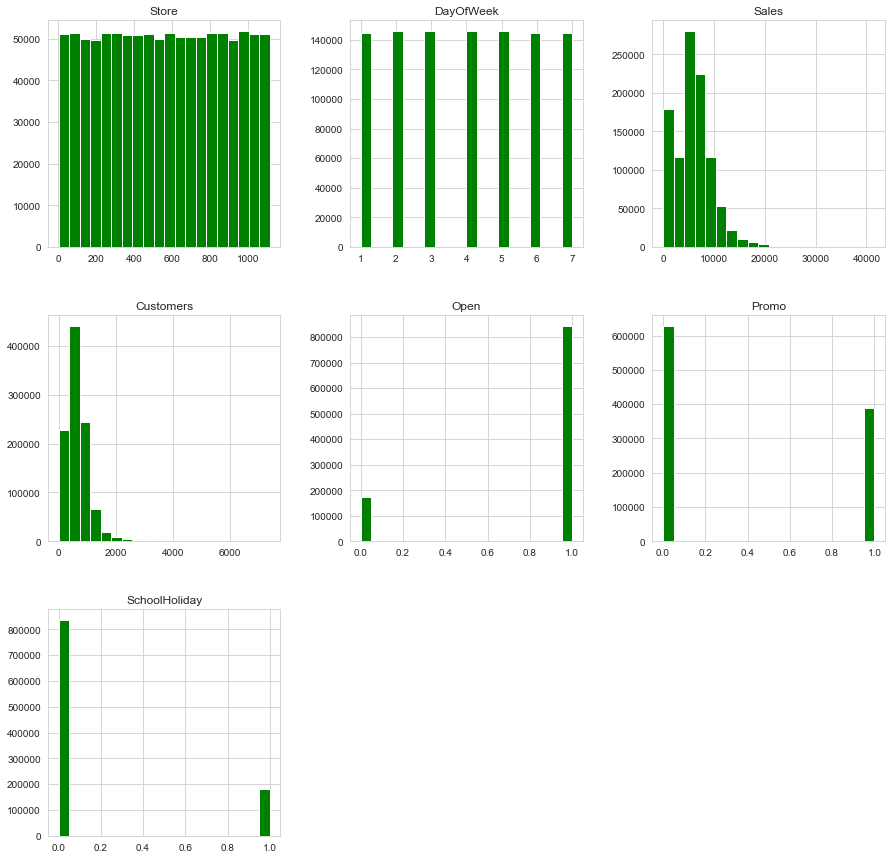

In [14]:
#create a histogram to give an idea of the visuals
#try to make sense of the data
df_train.hist(bins = 20,figsize=(15,15),color='g')
#data is equally distributed accross varuiois days of the week
#averagely about 600 comes to the store with a maximum of about4500

In [15]:
df_train['Customers'].max()

7388

In [16]:
#lets dig in to find out how many stores are open and how many are closed at the same time
closed_df_train= df_train[df_train['Open']==0]
open_df_train= df_train[df_train['Open']==1]

In [17]:
#check on how many stores are open or clsed at a time
print('total=',len(df_train))
print('number of closed stores=',len(closed_df_train))
print('number of open stores=',len(open_df_train))

total= 1017209
number of closed stores= 172817
number of open stores= 844392


In [18]:
#we shall work with only open stores data at this point by filtering the data
df_train=df_train[df_train['Open']==1]

In [19]:
#lets take a look at the dataframe after the filtering
df_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


In [20]:
#we shall drop the open column at this point(inplace is used to keep it in memory)
#df_train.drop(['Open'],axis = 1,inplace = True)
df_train.drop(['Open'],axis=1,inplace=True)

In [21]:
#checking on how the dataframe looks like after droping the open column
df_train

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1
...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,0,a,1
1016827,733,2,2013-01-01,10765,2377,0,a,1
1016863,769,2,2013-01-01,5035,1248,0,a,1
1017042,948,2,2013-01-01,4491,1039,0,a,1


In [22]:
#perform statistical analysis of new dataset
#there is a change in the average sales and number of customers because i did get rid of some data
df_train.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


Exploration of store dataset

<AxesSubplot:>

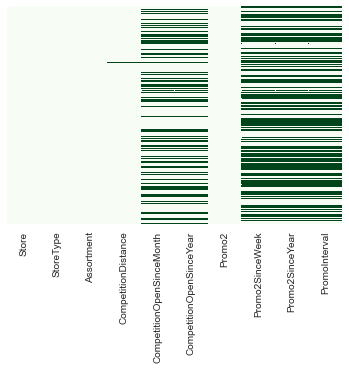

In [23]:
#checking for missing data with a heatmap 
sns.heatmap(df_store.isnull(),yticklabels=False,cbar=False,cmap='Greens')
#lots of missing data

In [24]:
#checking on the missing values in the compititionDistance
df_store[df_store['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [25]:
#checking on the missing values in the CompetitionOpenSinceMonth
df_store[df_store['CompetitionOpenSinceMonth'].isnull()]
# we have issues with 354 rows which is about a third of the dataset

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [26]:
#explore what happens when promo two = 0
df_store[df_store['Promo2']==0]
#outcome shows that whenever Promo2=0 we have Null #

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [27]:
#getting rid of the null values
#get rid of Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSinceMonth,CompetitionOpenSinceYear
str_cols=['Promo2SinceWeek','Promo2SinceYear','PromoInterval','CompetitionOpenSinceMonth','CompetitionOpenSinceYear']

In [28]:
#create a forloop to replace the null values
for str in str_cols:
    df_store[str].fillna(0,inplace=True)

<AxesSubplot:>

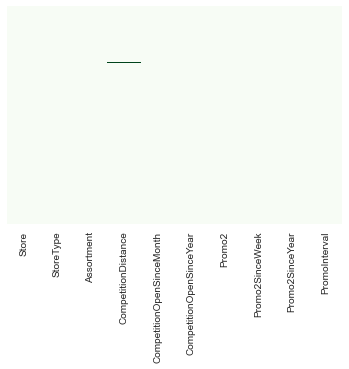

In [29]:
#check if the null values have bee replaced by creating another heatmap with same data
sns.heatmap(df_store.isnull(),yticklabels=False,cbar=False,cmap='Greens')

In [30]:
#I still have some missing data within CompititionDistance to take care of
#I will be using the mean value as a replacement 
df_store['CompetitionDistance'].fillna(df_store['CompetitionDistance'].mean(),inplace=True)

<AxesSubplot:>

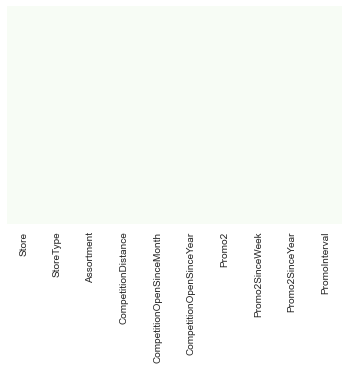

In [31]:
#plot the heatmap again to make sure the missing data has been taken care of
sns.heatmap(df_store.isnull(),yticklabels=False,cbar=False,cmap='Greens')#looks good

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'CompetitionDistance'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceMonth'}>],
       [<AxesSubplot:title={'center':'CompetitionOpenSinceYear'}>,
        <AxesSubplot:title={'center':'Promo2'}>,
        <AxesSubplot:title={'center':'Promo2SinceWeek'}>],
       [<AxesSubplot:title={'center':'Promo2SinceYear'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

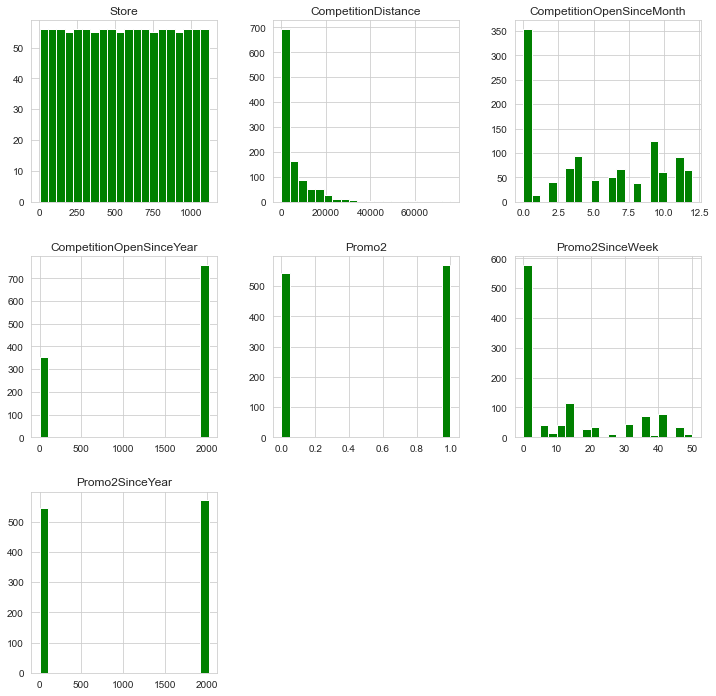

In [32]:
#plot a histogram to give the visuals after the exploration
df_store.hist(bins = 20,figsize=(12,12),color='g')

Merging Datasets for exploration

In [33]:
#merging both the train and store data
df_train_all = pd.merge(df_train,df_store,how='inner',on ='Store')

In [34]:
#checking on the new dataframe
df_train_all

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844388,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844389,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0
844390,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0


In [35]:
#checking for correlation regarding sales as that is what we are concerned with
df_train_all.corr()['Sales'].sort_values()
#data here gives us a lot of information to work with customers have the most correlation and least is Dayof week

DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

<AxesSubplot:>

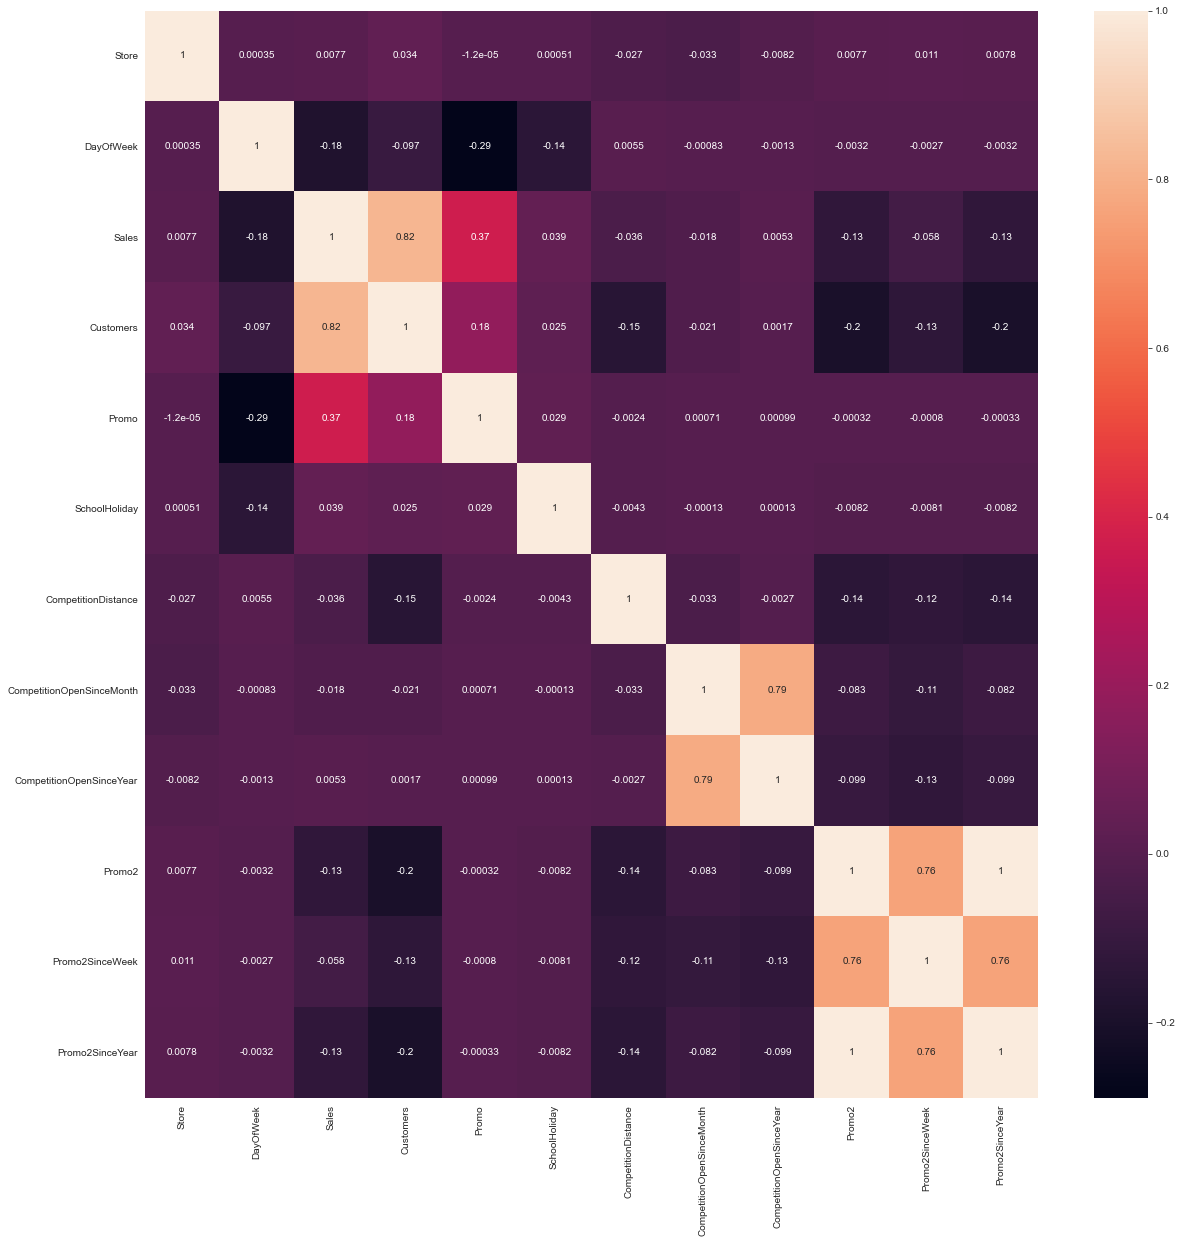

In [36]:
#to get a true picture of the correlations.Plot another heatmap
#the darker colors show there is less correltions and the lighter colors show there is more correlations
correlations=df_train_all.corr()
f,ax =plt.subplots(figsize=(20,20))
sns.heatmap(correlations,annot = True)

In [37]:
#from this point you want to seperate the year,month and day in the date 
df_train_all['Year']=pd.DatetimeIndex(df_train_all['Date']).year
df_train_all['Month']=pd.DatetimeIndex(df_train_all['Date']).month
df_train_all['Day']=pd.DatetimeIndex(df_train_all['Date']).day

In [38]:
df_train_all

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844387,292,1,2013-01-07,9291,1002,1,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013,1,7
844388,292,6,2013-01-05,2748,340,0,0,0,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013,1,5
844389,292,5,2013-01-04,4202,560,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013,1,4
844390,292,4,2013-01-03,4580,662,0,0,1,a,a,1100.0,6.0,2009.0,0,0.0,0.0,0,2013,1,3


Text(0.5, 1.0, 'Average Customers Per Month')

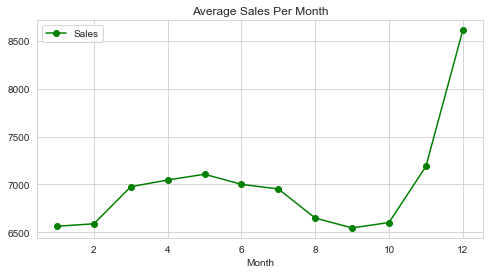

<Figure size 432x288 with 0 Axes>

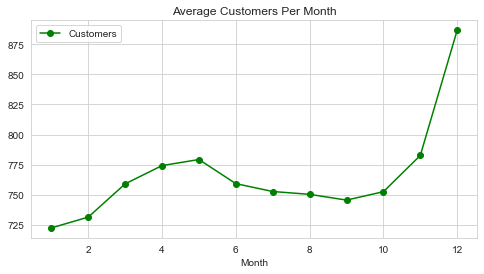

In [39]:
#visualize the month with the most sales 
axis = df_train_all.groupby('Month')[['Sales']].mean().plot(figsize=(8,4),marker ='o',color ='g')
axis.set_title('Average Sales Per Month')

plt.figure()

axis = df_train_all.groupby('Month')[['Customers']].mean().plot(figsize=(8,4),marker ='o',color ='g')
axis.set_title('Average Customers Per Month')

Text(0.5, 1.0, 'Average Customers Per Day')

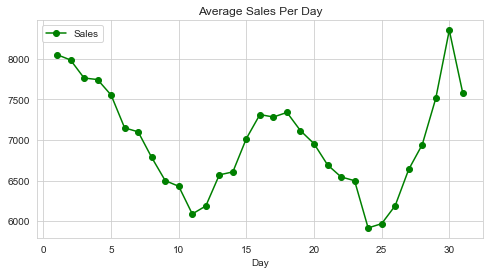

<Figure size 432x288 with 0 Axes>

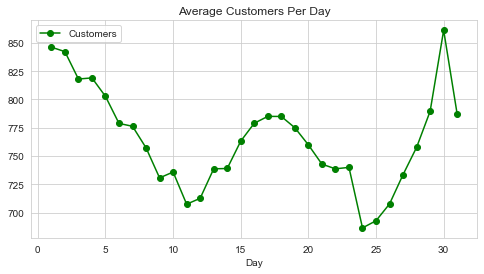

In [40]:
#visualize the daily activities in terms of sales and customers
axis = df_train_all.groupby('Day')[['Sales']].mean().plot(figsize=(8,4),marker ='o',color ='g')
axis.set_title('Average Sales Per Day')

plt.figure()

axis = df_train_all.groupby('Day')[['Customers']].mean().plot(figsize=(8,4),marker ='o',color ='g')
axis.set_title('Average Customers Per Day')

Text(0.5, 1.0, 'Average Customers Per Day of the Week')

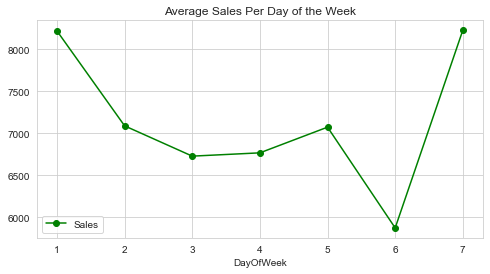

<Figure size 432x288 with 0 Axes>

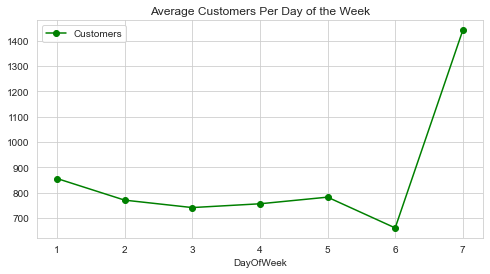

In [41]:
#visualize the specific days of the weeks activities in terms of sales and customers (day 7 = Sunday)
axis = df_train_all.groupby('DayOfWeek')[['Sales']].mean().plot(figsize=(8,4),marker ='o',color ='g')
axis.set_title('Average Sales Per Day of the Week')

plt.figure()

axis = df_train_all.groupby('DayOfWeek')[['Customers']].mean().plot(figsize=(8,4),marker ='o',color ='g')
axis.set_title('Average Customers Per Day of the Week')

<AxesSubplot:xlabel='Date'>

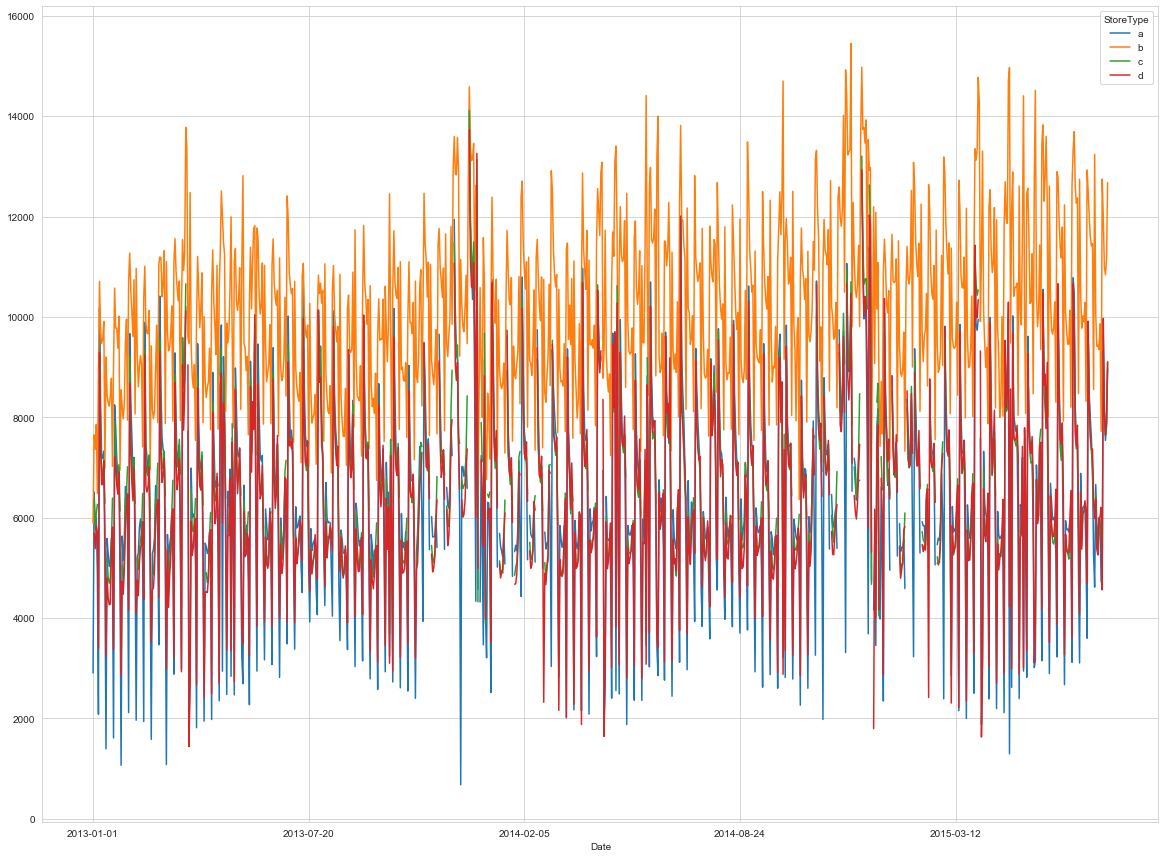

In [42]:
#would like to vizualize which store has the most sales
fig,ax = plt.subplots(figsize=(20,15))
df_train_all.groupby(['Date','StoreType']).mean()['Sales'].unstack().plot(ax=ax)

<AxesSubplot:xlabel='Promo', ylabel='Customers'>

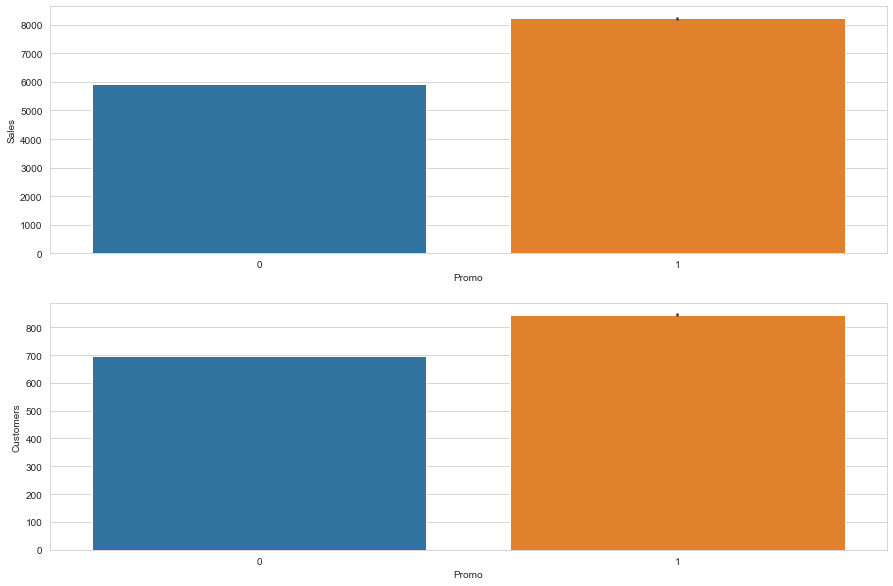

In [43]:
#further exploration using vizualization
plt.figure(figsize=[15,10])

plt.subplot(211)
sns.barplot(x='Promo',y ='Sales',data= df_train_all)
plt.subplot(212)
sns.barplot(x='Promo',y ='Customers',data= df_train_all)

<AxesSubplot:xlabel='Promo', ylabel='Customers'>

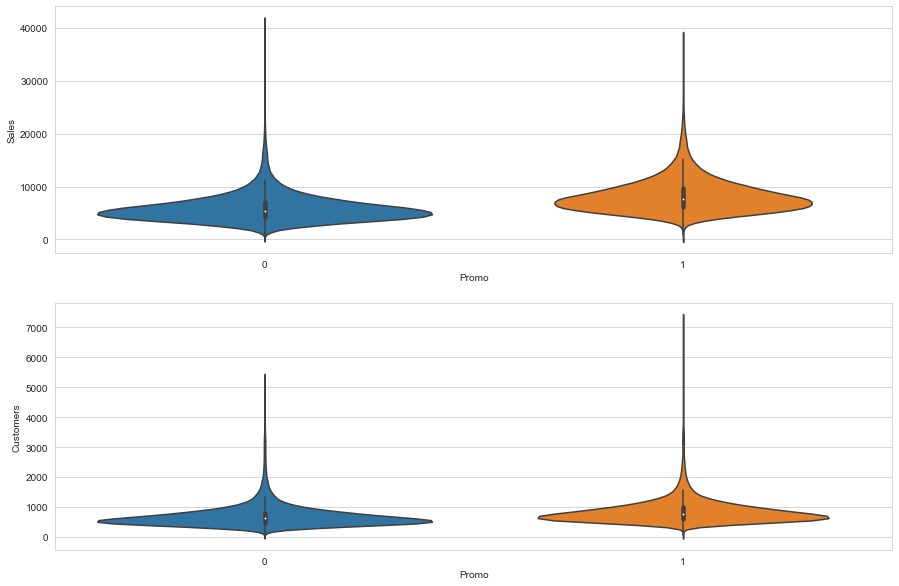

In [44]:
plt.figure(figsize=[15,10])

plt.subplot(211)
sns.violinplot(x='Promo',y ='Sales',data= df_train_all)
plt.subplot(212)
sns.violinplot(x='Promo',y ='Customers',data= df_train_all)


Facebook Prophet (Fit Prophet Model)

To use Prophet for forecasting, first, a Prophet() object is defined and configured, then it is fit on the dataset by calling the fit() function and passing the data.

The Prophet() object takes arguments to configure the type of model you want, such as the type of growth, the type of seasonality, and more. By default, the model will work hard to figure out almost everything automatically.

The fit() function takes a DataFrame of time series data. The DataFrame must have a specific format. The first column must have the name ‘ds‘ and contain the date-times. The second column must have the name ‘y‘ and contain the observations.

Will use facbook prophet to assit in the forcasting and time series 
https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html

In [45]:
#train model for prediction
#import facebook prophet
from fbprophet import Prophet

In [46]:
#to use fbprohet i need to rename the columns to meet the requirements
#i will rename the date and the sales
def sales_predictions(Store_ID,df_store,periods):
    
    df_store = df_store[df_store['Store'] == Store_ID]
    df_store = df_store[['Date','Sales']].rename(columns = {'Date': 'ds','Sales': 'y'})
    df_store= df_store.sort_values('ds')
    
    model=Prophet()
    model.fit(df_store)
    future = model.make_future_dataframe(periods=periods)
    forecast= model.predict(future)
    figure = model.plot(forecast,xlabel='Date',ylabel = 'Sales')
    figure2= model.plot_components(forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


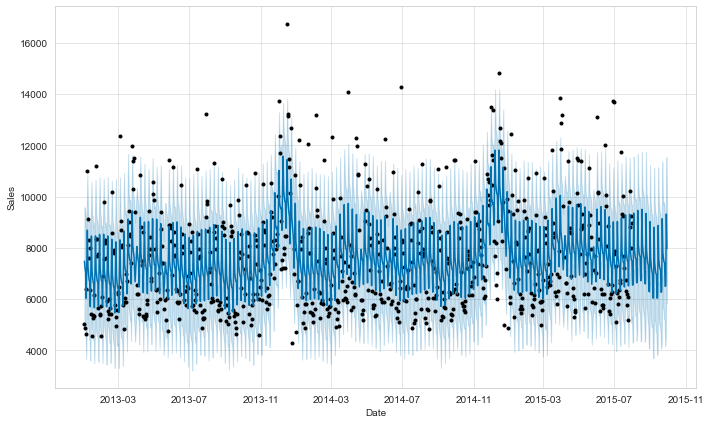

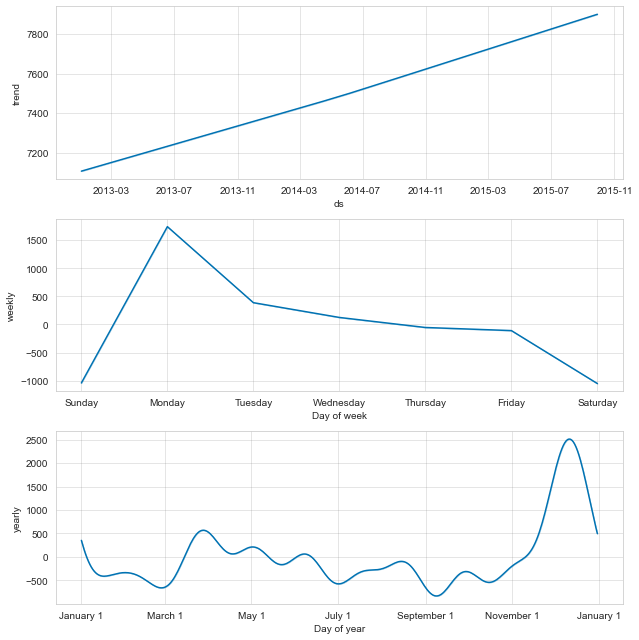

In [47]:
#black dots are the historic data
sales_predictions(12,df_train_all,60)

In [48]:
def sales_predictions(Store_ID,df_store,holidays,periods):
    
    df_store = df_store[df_store['Store'] == Store_ID]
    df_store = df_store[['Date','Sales']].rename(columns = {'Date': 'ds','Sales': 'y'})
    df_store= df_store.sort_values('ds')
    
    model=Prophet(holidays = holidays)
    model.fit(df_store)
    future = model.make_future_dataframe(periods=periods)
    forecast= model.predict(future)
    figure = model.plot(forecast,xlabel='Date',ylabel = 'Sales')
    figure2= model.plot_components(forecast)

In [49]:
#need info for the various holidays
school_holidays = df_train_all[df_train_all['SchoolHoliday']==1].loc[:,'Date'].values

In [50]:
school_holidays

array(['2015-07-31', '2015-07-30', '2015-07-29', ..., '2013-01-04',
       '2013-01-03', '2013-01-02'], dtype=object)

In [51]:
school_holidays.shape

(163457,)

In [52]:
#need info for the various holidays
state_holidays = df_train_all[(df_train_all['StateHoliday']== 'a')|(df_train_all['StateHoliday']== 'b')|(df_train_all['StateHoliday']== 'c')].loc[:,'Date'].values

In [53]:
state_holidays

array(['2014-10-03', '2013-10-03', '2015-06-04', '2014-06-19',
       '2013-05-30', '2015-06-04', '2014-06-19', '2013-05-30',
       '2014-10-03', '2013-10-03', '2015-05-01', '2014-10-31',
       '2014-05-01', '2013-10-03', '2013-05-01', '2015-06-04',
       '2014-06-19', '2013-05-30', '2015-06-04', '2014-06-19',
       '2013-05-30', '2013-08-15', '2015-06-04', '2014-06-19',
       '2013-05-30', '2013-08-15', '2013-08-15', '2015-05-25',
       '2015-05-14', '2015-05-01', '2015-04-06', '2015-04-03',
       '2015-01-01', '2014-12-26', '2014-12-25', '2014-10-03',
       '2014-06-09', '2014-05-29', '2014-05-01', '2014-04-21',
       '2014-04-18', '2014-01-01', '2013-12-26', '2013-12-25',
       '2013-10-03', '2013-05-20', '2013-05-09', '2013-05-01',
       '2013-04-01', '2013-03-29', '2013-01-01', '2014-10-03',
       '2015-06-04', '2014-06-19', '2013-05-30', '2015-06-04',
       '2014-06-19', '2013-05-30', '2015-06-04', '2014-06-19',
       '2013-05-30', '2013-10-03', '2014-10-03', '2013-

In [54]:
state_holidays.shape

(910,)

In [55]:
#merge both school and state holidays by using concantinate

In [56]:
state_holidays = pd.DataFrame({'ds':pd.to_datetime(state_holidays),
                               'holiday':'state_holidays'})

In [57]:
#aggregate to holiday
state_holidays

,ds,holiday
0,2014-10-03,state_holidays
1,2013-10-03,state_holidays
2,2015-06-04,state_holidays
3,2014-06-19,state_holidays
4,2013-05-30,state_holidays
...,...,...
905,2013-04-01,state_holidays
906,2013-08-15,state_holidays
907,2015-06-04,state_holidays
908,2014-06-19,state_holidays


In [58]:
school_holidays = pd.DataFrame({'ds':pd.to_datetime(school_holidays),
                               'holiday':'school_holidays'})

In [59]:
#new dataframe
school_holidays

,ds,holiday
0,2015-07-31,school_holidays
1,2015-07-30,school_holidays
2,2015-07-29,school_holidays
3,2015-07-28,school_holidays
4,2015-07-27,school_holidays
...,...,...
163452,2013-02-05,school_holidays
163453,2013-02-04,school_holidays
163454,2013-01-04,school_holidays
163455,2013-01-03,school_holidays


In [60]:
school_state_holidays= pd.concat((school_holidays,state_holidays))

In [61]:
#dataframe for both holidays
school_state_holidays

,ds,holiday
0,2015-07-31,school_holidays
1,2015-07-30,school_holidays
2,2015-07-29,school_holidays
3,2015-07-28,school_holidays
4,2015-07-27,school_holidays
...,...,...
905,2013-04-01,state_holidays
906,2013-08-15,state_holidays
907,2015-06-04,state_holidays
908,2014-06-19,state_holidays


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


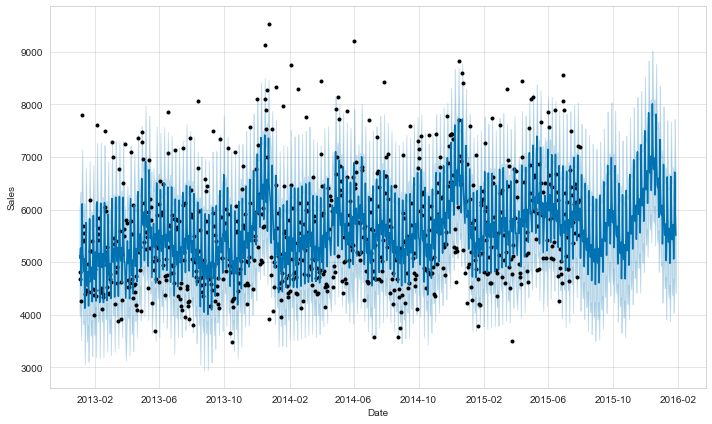

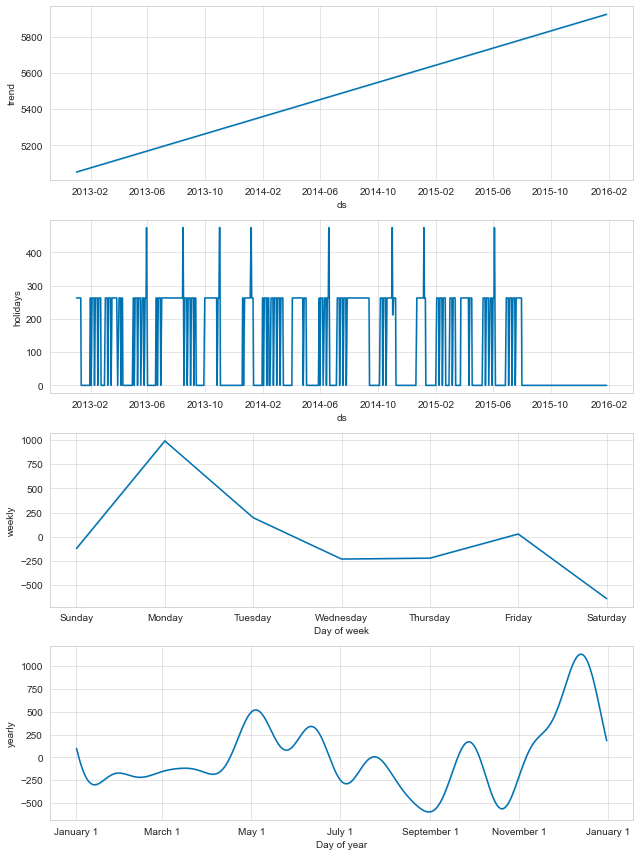

In [62]:
#time to make the prediction with facebook prophet
#i will be predicting sales in store #6 for the next 180days
sales_predictions(10,df_train_all,school_state_holidays,180)